In [28]:
import pandas as pd
import numpy as np

In [29]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [30]:
x = pd.DataFrame(data, columns=["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIDO", "B", "LSTAT"])
y = pd.DataFrame(target, columns=["PRICE"])

In [31]:
print(x)
print(y)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIDO       B  LSTAT  
0        15.3  396.90   4.98  
1        17.8  396.90   9.14  
2     

In [32]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import r2_score

In [33]:
x = pd.DataFrame(data, columns=["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIDO", "B", "LSTAT"])
y = pd.DataFrame(target, columns=["PRICE"])

In [34]:
# 집 값을 예측할 것

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

model = DecisionTreeRegressor(max_depth=4)
model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [35]:
model.score(x_test, y_test)

0.8550736930450994

In [41]:
predict = model.predict(x_test)
r2_score(y_test, predict)

0.8550736930450994

In [37]:
import graphviz

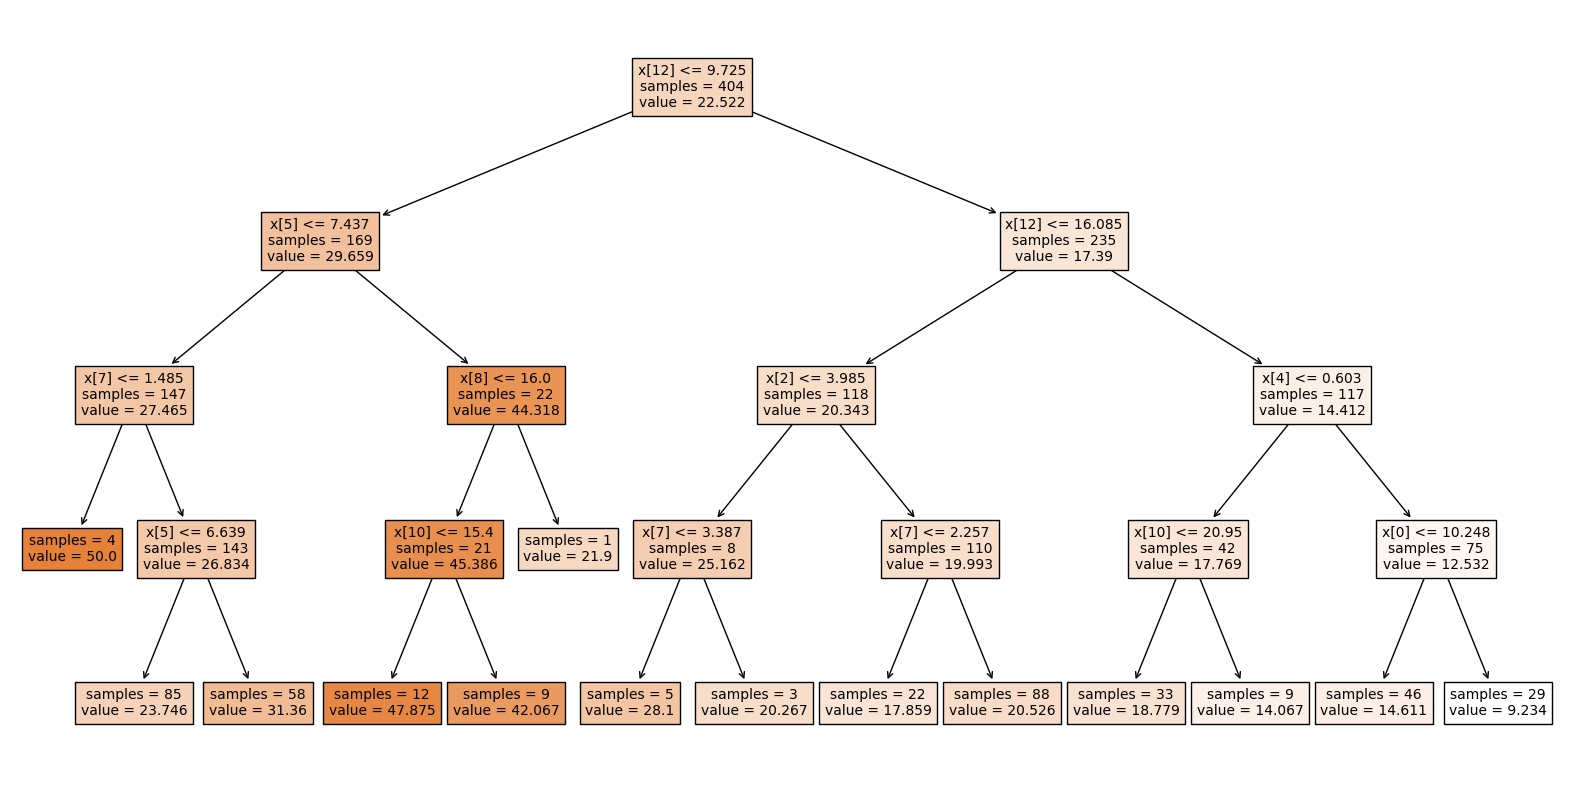

In [47]:
plt.figure(figsize=(20, 10))
plot_tree(model, impurity=False, filled=True, fontsize=10)

plt.show()

In [43]:
import seaborn as sns

<Axes: >

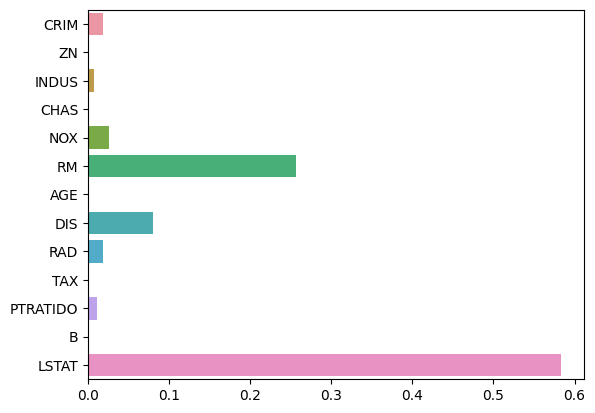

In [45]:
sns.barplot(x=model.feature_importances_, y=x.columns)